## Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("training.csv")

In [3]:
df.head(10)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.245333,b
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.018636,s
8,100008,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.296003,b
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,...,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.001502,s


In [4]:
def info_about_dataset(data):
    display("Size of Data",data.shape)
    print("*"*100)
    display("Statistical Definition of Data",data.describe())
    print("*"*100)
    display("Missing Values in data",data.isnull().sum())
    print("*"*100)
    display("Info about data types",data.info())
    print("*"*100)
  

In [5]:
info_about_dataset(df)

'Size of Data'

(250000, 33)

****************************************************************************************************


'Statistical Definition of Data'

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


****************************************************************************************************


'Missing Values in data'

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep

'Info about data types'

None

****************************************************************************************************


In [6]:
## Lets Check the data for Discrete and Continuous Columns

## Data Exploration

In [7]:
## Discrete Data are limited they can take only certain values.

discrete_columns = [col for col in df.columns if len(df[col].unique()) < 50 and col not in ['EventId']]
print("Discrete Columns Count",len(discrete_columns))

Discrete Columns Count 2


In [8]:
discrete_columns

['PRI_jet_num', 'Label']

In [9]:
data = df.copy()

In [10]:
data[discrete_columns].head()

,PRI_jet_num,Label
0,2,s
1,1,b
2,1,b
3,0,b
4,0,b


Text(0.5, 1.0, 'HistPlot of PRI_jet_num')

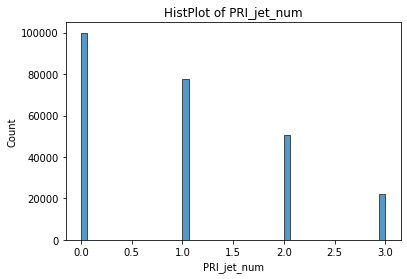

In [11]:
sns.histplot(data['PRI_jet_num']);
plt.title("HistPlot of PRI_jet_num")


Text(0.5, 1.0, 'Frequency Distribution of Label')

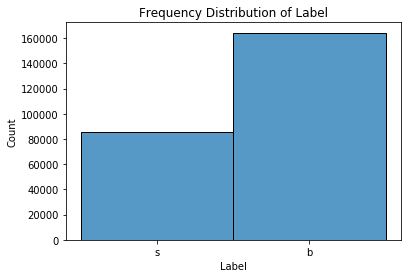

In [12]:
sns.histplot(data['Label'])
plt.title('Frequency Distribution of Label')

In [13]:
## Count Values of Target Column i.e., Label

data['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [14]:
## Continuous data is data that can take any value.

continuous_columns = [col for col in df.columns if col not in discrete_columns+['EventId']]
print("Count of continuous Columns",len(continuous_columns))

Count of continuous Columns 30


In [15]:
for col in continuous_columns:
    print(col)

DER_mass_MMC
DER_mass_transverse_met_lep
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_tau_lep
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_tau
DER_met_phi_centrality
DER_lep_eta_centrality
PRI_tau_pt
PRI_tau_eta
PRI_tau_phi
PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_met
PRI_met_phi
PRI_met_sumet
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
Weight


## Distribution of Continuous Data

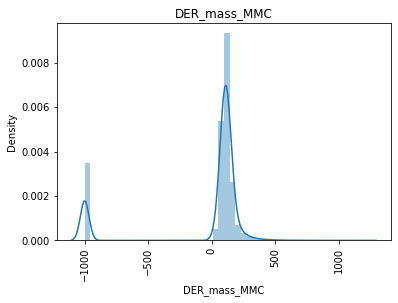

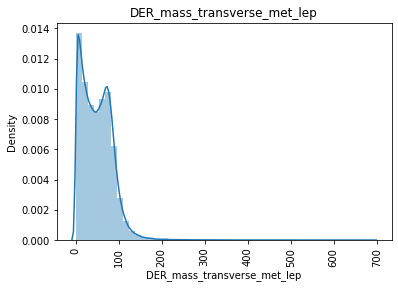

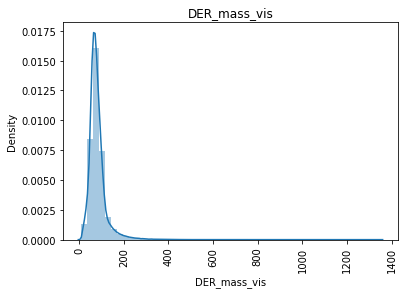

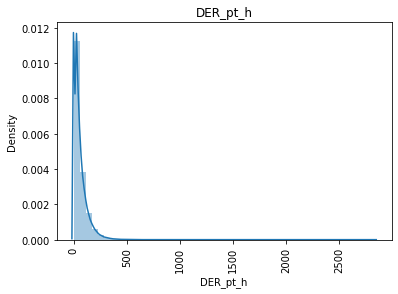

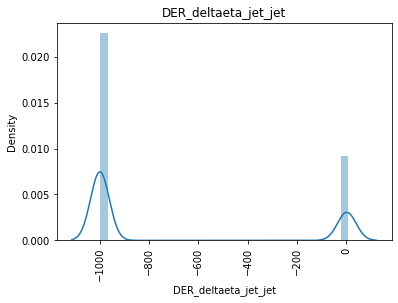

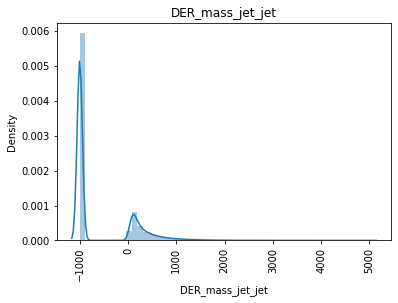

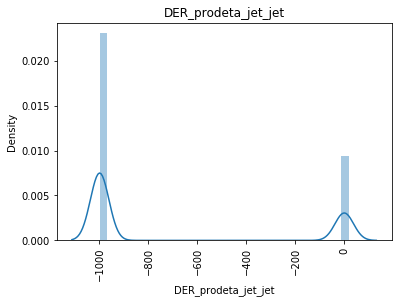

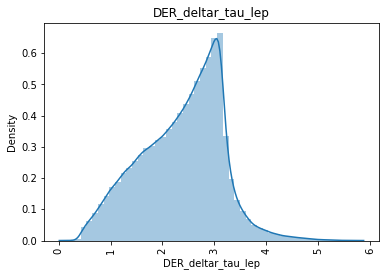

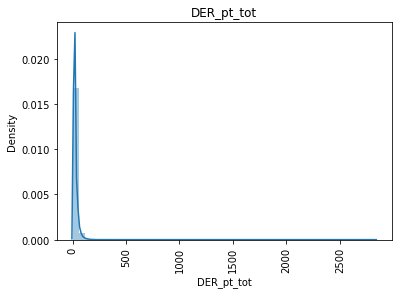

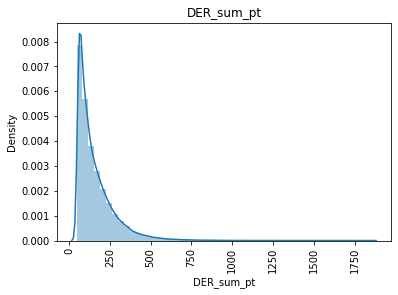

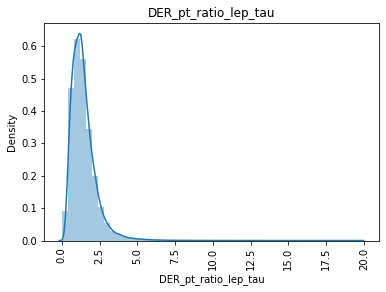

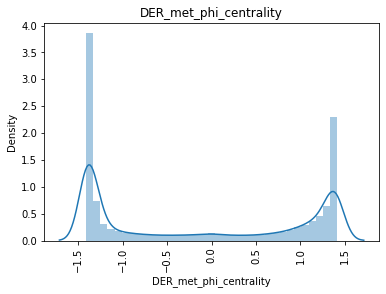

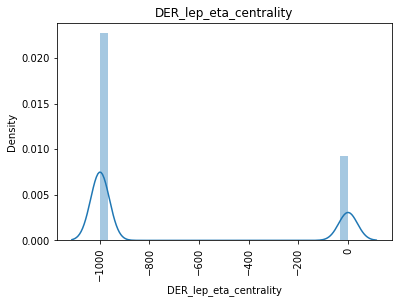

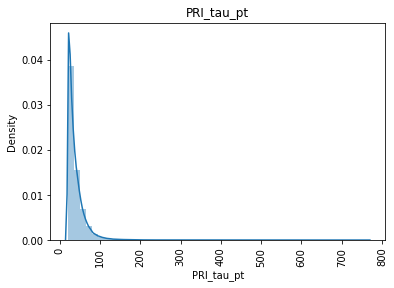

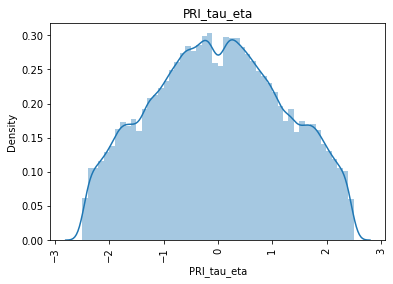

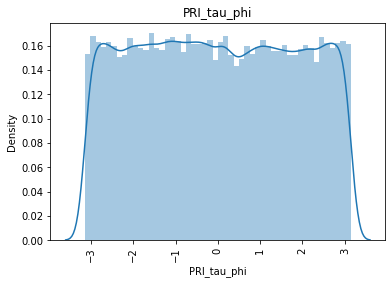

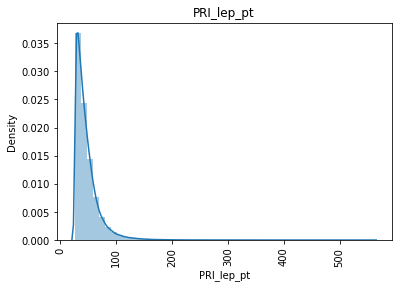

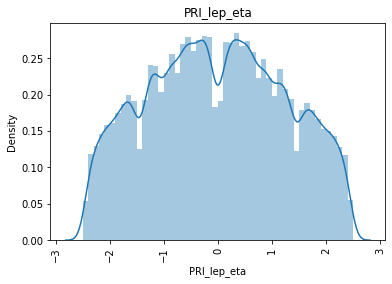

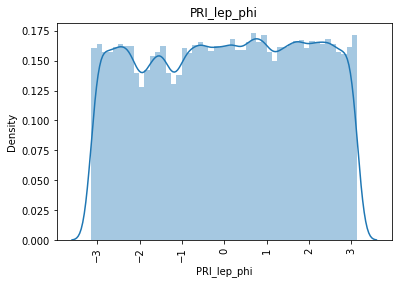

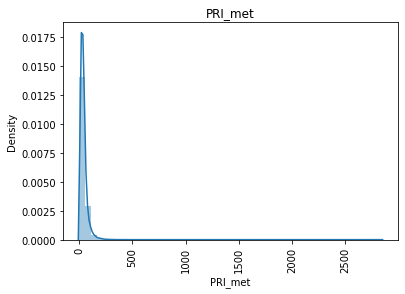

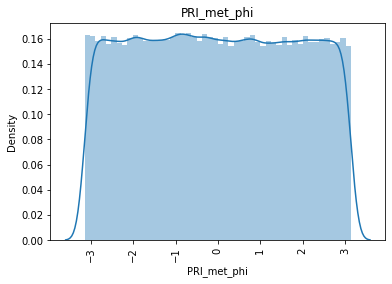

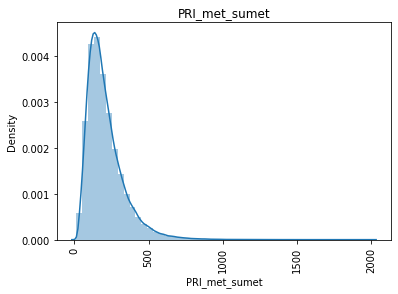

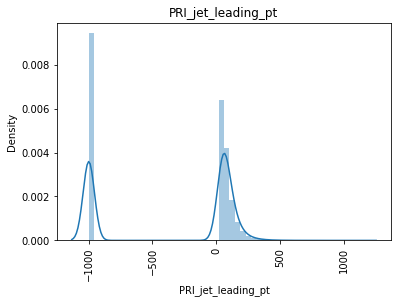

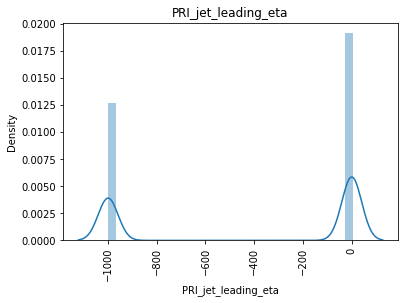

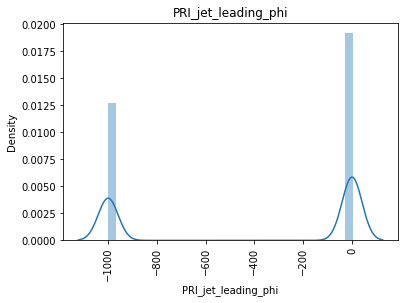

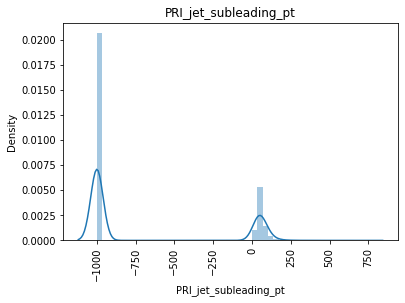

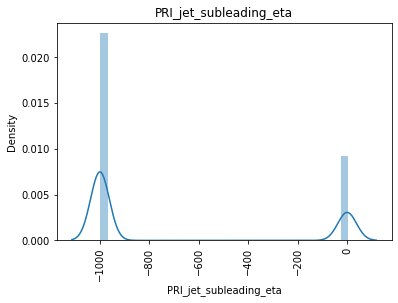

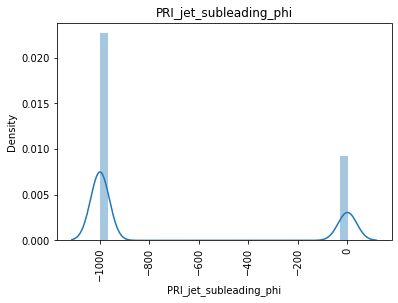

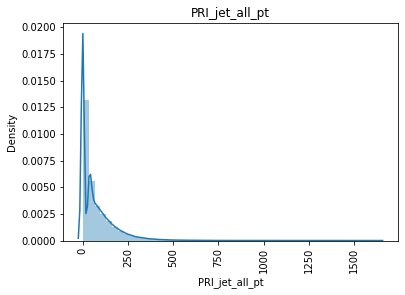

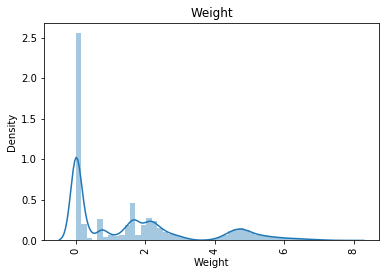

In [16]:
for x in continuous_columns:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.distplot(data[x]);
    plt.xlabel(x)
    plt.title(x)
    plt.xticks(rotation=90)

## Removing Outliers 

### Visualizing distplot and boxplot before removing outliers

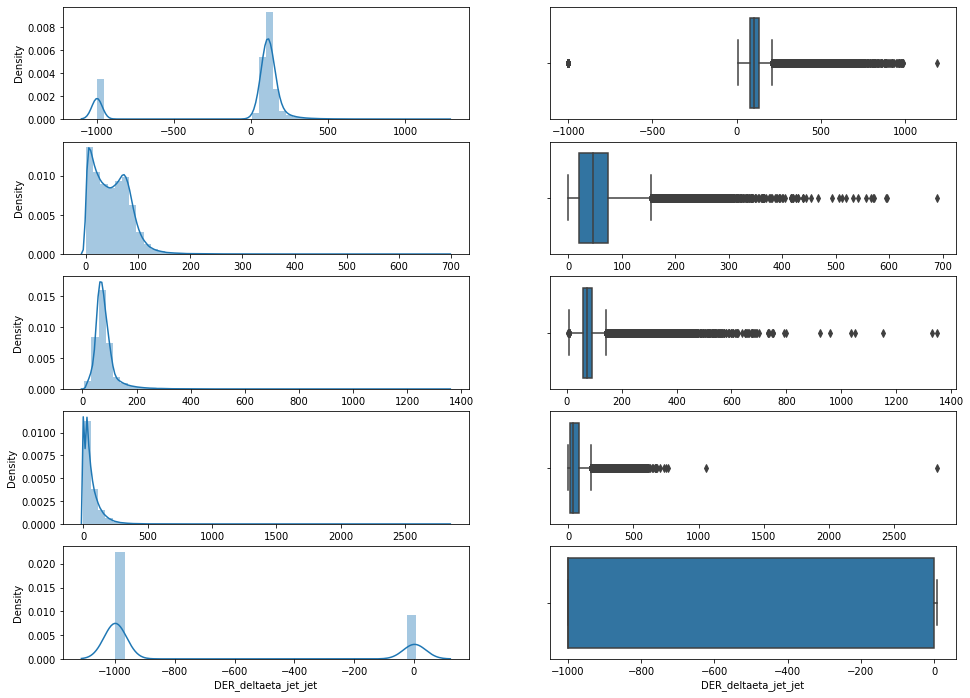

In [17]:
plt.figure(figsize=((16,12)))
plt.subplot(5,2,1)
sns.distplot(df["DER_mass_MMC"])
plt.subplot(5,2,2)
sns.boxplot(df["DER_mass_MMC"])
plt.subplot(5,2,3)
sns.distplot(df["DER_mass_transverse_met_lep"])
plt.subplot(5,2,4)
sns.boxplot(df["DER_mass_transverse_met_lep"])
plt.subplot(5,2,5)
sns.distplot(df["DER_mass_vis"])
plt.subplot(5,2,6)
sns.boxplot(df["DER_mass_vis"])
plt.subplot(5,2,7)
sns.distplot(df["DER_pt_h"])
plt.subplot(5,2,8)
sns.boxplot(df["DER_pt_h"])
plt.subplot(5,2,9)
sns.distplot(df["DER_deltaeta_jet_jet"])
plt.subplot(5,2,10)
sns.boxplot(df["DER_deltaeta_jet_jet"])


In [18]:
# for x in continuous_columns:
#     for i in range(1,31):
#         plt.figure(figsize=(16,12))
#         plt.subplot(30,2,i)
#         sns.distplot(data[x])
#         plt.subplot(30,2,i+1)
#         sns.boxplot(data[x])

In [19]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [20]:
## Removing Outiers 

def cap_data(data):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.1,0.95]).values
            print(percentiles)
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  EventId
[124999.9  337499.05]
capping the  DER_mass_MMC
[-999.     201.808]
capping the  DER_mass_transverse_met_lep
[  6.887  104.6442]
capping the  DER_mass_vis
[ 46.949   149.27005]
capping the  DER_pt_h
[  2.236  183.4911]
capping the  DER_deltaeta_jet_jet
[-999.       4.276]
capping the  DER_mass_jet_jet
[-999.     631.186]
capping the  DER_prodeta_jet_jet
[-999.       1.767]
capping the  DER_deltar_tau_lep
[1.242 3.441]
capping the  DER_pt_tot
[ 1.223   56.68915]
capping the  DER_sum_pt
[ 61.3039 383.0024]
capping the  DER_pt_ratio_lep_tau
[0.609 2.897]
capping the  DER_met_phi_centrality
[-1.41   1.412]
capping the  DER_lep_eta_centrality
[-9.99e+02  9.45e-01]
capping the  PRI_tau_pt
[21.617   77.88245]
capping the  PRI_tau_eta
[-1.693  2.011]
capping the  PRI_tau_phi
[-2.521  2.83 ]
capping the  PRI_lep_pt
[28.447  86.6471]
capping the  PRI_lep_eta
[-1.771  2.066]
capping the  PRI_lep_phi
[-2.517  2.838]
capping the  PRI_met
[12.3729 99.891 ]
capping the  PRI_met_p

In [21]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,225937.017500,-53.427996,48.198609,79.296312,54.540572,-708.469762,-623.642976,-709.472539,2.382505,17.639545,...,205.537476,0.979176,-351.804051,-399.282437,-399.272839,-694.084388,-709.162095,-709.145787,67.742702,1.614255
std,69740.309625,402.472999,30.750221,26.872371,51.471923,454.403495,597.621717,452.837273,0.684317,16.641031,...,103.272718,0.977426,529.080644,489.315166,489.323160,476.982797,453.321049,453.346396,79.378624,1.800146
min,124999.900000,-999.000000,6.887000,46.949000,2.236000,-999.000000,-999.000000,-999.000000,1.242000,1.223000,...,85.967900,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001503
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,337499.050000,201.808000,104.644200,149.270050,183.491100,4.276000,631.186000,1.767000,3.441000,56.689150,...,449.873200,3.000000,169.457200,2.559000,2.617000,77.286050,2.152000,2.060000,263.951550,5.348034


## Visualizing Distplot and Boxplot After Removing Outliers

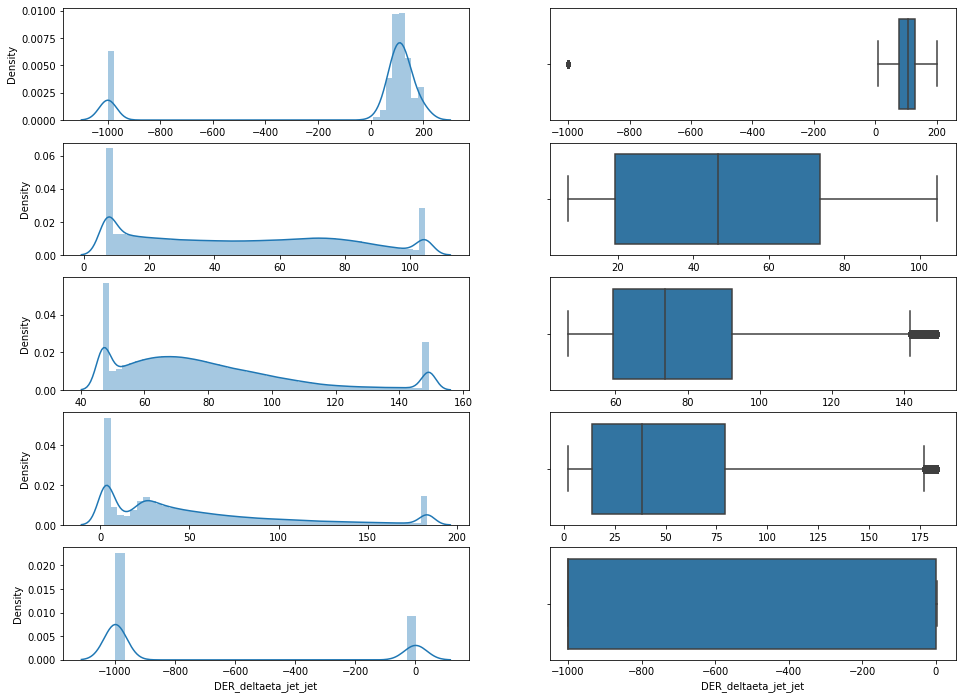

In [22]:
plt.figure(figsize=((16,12)))
plt.subplot(5,2,1)
sns.distplot(df["DER_mass_MMC"])
plt.subplot(5,2,2)
sns.boxplot(df["DER_mass_MMC"])
plt.subplot(5,2,3)
sns.distplot(df["DER_mass_transverse_met_lep"])
plt.subplot(5,2,4)
sns.boxplot(df["DER_mass_transverse_met_lep"])
plt.subplot(5,2,5)
sns.distplot(df["DER_mass_vis"])
plt.subplot(5,2,6)
sns.boxplot(df["DER_mass_vis"])
plt.subplot(5,2,7)
sns.distplot(df["DER_pt_h"])
plt.subplot(5,2,8)
sns.boxplot(df["DER_pt_h"])
plt.subplot(5,2,9)
sns.distplot(df["DER_deltaeta_jet_jet"])
plt.subplot(5,2,10)
sns.boxplot(df["DER_deltaeta_jet_jet"])


In [23]:
# sns.pairplot(df)

## Visualizing Correlations Between Columns

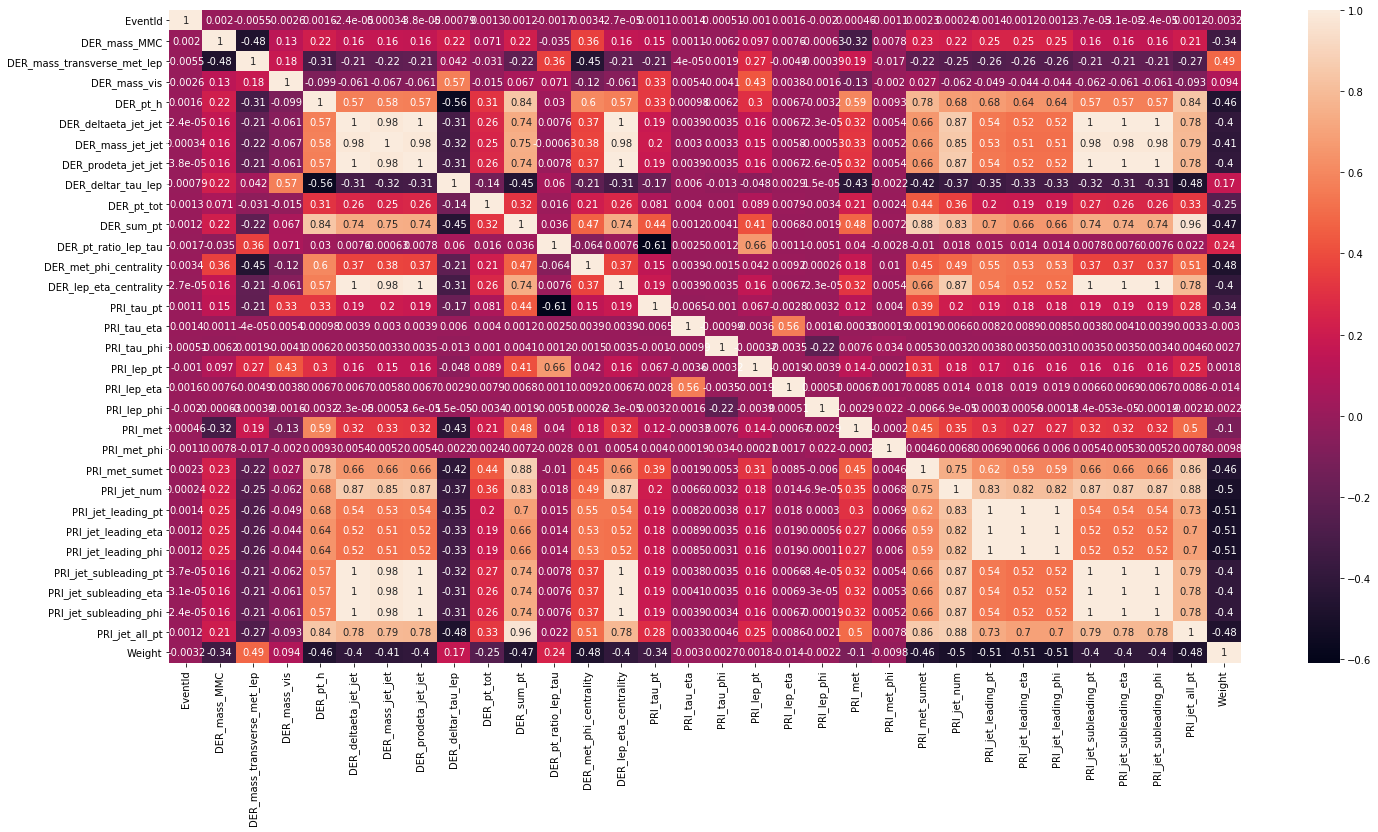

In [24]:
plt.figure(figsize=((24,12)))
sns.heatmap(df.corr(),annot=True)

## Dropped  Columns Which is more than 90% Correlated.

In [25]:
## As we see many columns are correlated lets drop the correlated features.
print("Before Dropping Correlated Features Size of Dataset",df.shape)
corr_matrix = df.corr().abs()


# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

print("After Dropping Correlated Features Size of Dataset",df.shape)
print("Dropped Correlated Columns",to_drop)


Before Dropping Correlated Features Size of Dataset (250000, 33)
After Dropping Correlated Features Size of Dataset (250000, 24)
Dropped Correlated Columns ['DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


## Scaling the Data

In [26]:
from sklearn.preprocessing import MinMaxScaler ## scale the data between 0 and 1.
from sklearn.model_selection import train_test_split ## split the data into training and testing
from sklearn.model_selection import cross_val_score ## to check the accuracy of machine learning libraries

In [27]:
df["Label"] = df["Label"].map({"b":1,"s":0}) ## encoding categorical columns into numerical

In [28]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,Weight,Label
0,124999.9,138.470,51.6550,97.827,27.980,0.91,3.064,41.928,197.7600,1.582,...,51.6260,2.066,-2.414,16.8240,-0.277,258.7330,2,67.435,0.002653,0
1,124999.9,160.937,68.7680,103.235,48.146,-999.00,3.441,2.078,125.1570,0.879,...,36.9180,0.501,0.103,44.7040,-1.916,164.5460,1,46.226,2.233584,1
2,124999.9,-999.000,104.6442,125.953,35.635,-999.00,3.148,9.336,197.8140,2.897,...,86.6471,-0.953,1.052,54.2830,-2.186,260.4140,1,44.251,2.347389,1
3,124999.9,143.905,81.4170,80.943,2.236,-999.00,3.310,1.223,75.9680,2.354,...,53.3210,-0.522,-2.517,31.0820,0.060,86.0620,0,-999.000,5.348034,1
4,124999.9,175.864,16.9150,134.805,16.405,-999.00,3.441,16.405,61.3039,1.056,...,29.7740,0.798,1.569,12.3729,-0.871,85.9679,0,-999.000,5.348034,1


In [29]:
scaling = MinMaxScaler()
df_scaled = pd.DataFrame(scaling.fit_transform(df), columns=df.columns)

In [30]:
df_scaled.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,Weight,Label
0,0.0,0.947254,0.457951,0.497239,0.142032,0.996645,0.828558,0.733871,0.424174,0.425262,...,0.398264,1.000000,0.019234,0.050859,0.419476,0.474753,0.666667,0.912686,0.000215,0.0
1,0.0,0.965964,0.633007,0.550092,0.253289,0.000000,1.000000,0.015415,0.198487,0.118007,...,0.145550,0.592129,0.489262,0.369422,0.112547,0.215930,0.333333,0.894535,0.417482,1.0
2,0.0,0.000000,1.000000,0.772119,0.184265,0.000000,0.866758,0.146269,0.424342,1.000000,...,1.000000,0.213187,0.666480,0.478874,0.061985,0.479372,0.333333,0.892845,0.438768,1.0
3,0.0,0.951780,0.762399,0.332229,0.000000,0.000000,0.940427,0.000000,0.045583,0.762675,...,0.427388,0.325515,0.000000,0.213774,0.482584,0.000259,0.000000,0.000000,1.000000,1.0
4,0.0,0.978395,0.102581,0.858631,0.078172,0.000000,1.000000,0.273716,0.000000,0.195367,...,0.022801,0.669533,0.763025,0.000000,0.308240,0.000000,0.000000,0.000000,1.000000,1.0


In [31]:
df_scaled.drop(['EventId'], axis = 1 ,inplace=True) ## Dropped unuseful columns

In [32]:
df_scaled.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,Weight,Label
0,0.947254,0.457951,0.497239,0.142032,0.996645,0.828558,0.733871,0.424174,0.425262,0.994330,...,0.398264,1.000000,0.019234,0.050859,0.419476,0.474753,0.666667,0.912686,0.000215,0.0
1,0.965964,0.633007,0.550092,0.253289,0.000000,1.000000,0.015415,0.198487,0.118007,1.000000,...,0.145550,0.592129,0.489262,0.369422,0.112547,0.215930,0.333333,0.894535,0.417482,1.0
2,0.000000,1.000000,0.772119,0.184265,0.000000,0.866758,0.146269,0.424342,1.000000,1.000000,...,1.000000,0.213187,0.666480,0.478874,0.061985,0.479372,0.333333,0.892845,0.438768,1.0
3,0.951780,0.762399,0.332229,0.000000,0.000000,0.940427,0.000000,0.045583,0.762675,0.044295,...,0.427388,0.325515,0.000000,0.213774,0.482584,0.000259,0.000000,0.000000,1.000000,1.0
4,0.978395,0.102581,0.858631,0.078172,0.000000,1.000000,0.273716,0.000000,0.195367,0.008859,...,0.022801,0.669533,0.763025,0.000000,0.308240,0.000000,0.000000,0.000000,1.000000,1.0


## Splitting the Dataset into Training and Testing


In [33]:
X = df_scaled.drop(['Label'],axis=1) ## independent features
y = df_scaled['Label'] ## target feature i.e, which we want to predict

In [34]:
X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,Weight
0,0.947254,0.457951,0.497239,0.142032,0.996645,0.828558,0.733871,0.424174,0.425262,0.994330,...,0.542329,0.398264,1.000000,0.019234,0.050859,0.419476,0.474753,0.666667,0.912686,0.000215
1,0.965964,0.633007,0.550092,0.253289,0.000000,1.000000,0.015415,0.198487,0.118007,1.000000,...,0.000000,0.145550,0.592129,0.489262,0.369422,0.112547,0.215930,0.333333,0.894535,0.417482
2,0.000000,1.000000,0.772119,0.184265,0.000000,0.866758,0.146269,0.424342,1.000000,1.000000,...,0.079985,1.000000,0.213187,0.666480,0.478874,0.061985,0.479372,0.333333,0.892845,0.438768
3,0.951780,0.762399,0.332229,0.000000,0.000000,0.940427,0.000000,0.045583,0.762675,0.044295,...,0.472996,0.427388,0.325515,0.000000,0.213774,0.482584,0.000259,0.000000,0.000000,1.000000
4,0.978395,0.102581,0.858631,0.078172,0.000000,1.000000,0.273716,0.000000,0.195367,0.008859,...,0.054195,0.022801,0.669533,0.763025,0.000000,0.308240,0.000000,0.000000,0.000000,1.000000


In [35]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Label, dtype: float64

In [36]:
## splitting the dataset 80 per for training and remaining 20 per for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [37]:
X_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,Weight
75381,0.955209,0.084597,0.347553,1.000000,0.997711,0.030014,0.110536,1.000000,0.178759,0.919561,...,0.662867,0.645892,0.406568,0.875257,1.000000,0.844944,1.000000,0.666667,1.000000,0.000000
65569,0.902333,0.452079,0.094291,0.282982,0.995744,0.359254,0.020012,0.255056,0.360577,0.899362,...,0.021491,0.187903,0.000000,0.394585,0.151501,0.045880,0.182875,0.666667,0.888940,0.271830
163473,0.906301,0.462114,0.155647,0.327505,0.998846,0.355616,0.287977,0.353480,0.000000,0.538979,...,0.707531,0.000000,0.929893,0.328291,0.163773,0.803745,0.611253,0.666667,0.911726,0.153055
90518,0.941187,0.175619,0.361284,0.549452,1.000000,0.358799,0.489866,0.476642,0.212850,0.982282,...,0.909736,0.301065,0.883503,0.593091,0.362795,0.696067,0.495550,0.666667,0.921657,0.000000
138866,1.000000,0.771575,0.851350,1.000000,0.997719,0.873124,0.853692,0.753355,0.649038,0.986180,...,0.988787,0.351099,0.174355,0.697479,1.000000,0.889139,1.000000,1.000000,0.968320,0.275637


In [38]:
X_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,Weight
38683,0.945507,0.258344,0.471154,0.120140,0.000000,0.640291,0.410863,0.061266,0.000000,0.153792,...,0.197159,0.000000,0.034923,0.589729,0.322940,0.781273,0.235281,0.000000,0.000000,0.857430
64939,0.934493,0.686190,0.255236,0.000000,0.000000,0.881764,0.013125,0.039366,0.654283,0.876683,...,0.060549,0.373006,0.671358,0.652474,0.170320,0.059551,0.000000,0.000000,0.000000,0.936015
3954,0.927039,0.720100,0.367774,0.000000,0.000000,0.712142,0.003155,0.079858,0.499563,0.019844,...,0.229116,0.462783,0.591347,0.884407,0.177519,0.367978,0.000000,0.000000,0.000000,0.887689
120374,0.926824,0.315332,0.304131,0.393396,0.997239,0.372897,0.017236,0.359355,0.026661,0.988661,...,0.248925,0.150721,0.166536,0.633053,0.125072,0.374719,0.380921,0.666667,0.894118,0.003205
172861,0.000000,0.768608,0.085593,0.072351,0.000000,0.318781,0.254696,0.004610,0.372378,0.000000,...,0.874416,0.151735,0.430023,0.012138,0.478885,0.441948,0.035713,0.000000,0.000000,0.920751


## Model Building

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### 1. Logistic Regression

In [40]:
model_list = []

def models_lr(x,y,x_train,y_train,x_test,y_test):
    mod = {}
    
    ## Fitting Training Data
    model = LogisticRegression().fit(x_train,y_train) 
    
    ypred = model.predict(X_test) ## prediction on testing data 
    mod['Model'] = 'LogisticRegression'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['Cross-val Score'] = cross_val_score(model,X,y,cv=5).mean() ## Cross validation
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test) 
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
model_list.append(models_lr(X,y,X_train,y_train,X_test,y_test))


### 2. GaussianNB Classifier

In [41]:
def models_gb(x,y,x_train,y_train,x_test,y_test):
    mod = {}
    model = GaussianNB().fit(x_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'GaussianNB'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['Cross-val Score'] = cross_val_score(model,X,y,cv=5).mean()
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
model_list.append(models_gb(X,y,X_train,y_train,X_test,y_test))


### 3. SGDClassifier

In [42]:
def models_sgd(x,y,x_train,y_train,x_test,y_test):
    mod = {}
    model = SGDClassifier(loss='modified_huber',shuffle=True, random_state=101).fit(x_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'SGDClassifier'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['Cross-val Score'] = cross_val_score(model,X,y,cv=5).mean()
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
model_list.append(models_sgd(X,y,X_train,y_train,X_test,y_test))


### 4. DecisionTreeClassifier 

In [43]:
def models_dt(x,y,x_train,y_train,x_test,y_test):
    mod = {}
    model = DecisionTreeClassifier().fit(x_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'DecisionTreeClassifier'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['Cross-val Score'] = cross_val_score(model,X,y,cv=5).mean()
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
model_list.append(models_dt(X,y,X_train,y_train,X_test,y_test))


### 5. RandomForestClassifier

In [44]:
def models_rf(x,y,x_train,y_train,x_test,y_test):
    mod = {}
    model = RandomForestClassifier().fit(x_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'RandomForestClassifier'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['Cross-val Score'] = cross_val_score(model,X,y,cv=5).mean()
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
model_list.append(models_rf(X,y,X_train,y_train,X_test,y_test))


## Model Comparison and Their Accuracies

In [45]:
model_score = pd.DataFrame(model_list)
model_score

,Model,Train_Score,Test_accuracy,Cross-val Score,f1score,recall,precision,roc_auc
0,LogisticRegression,0.972265,0.97124,0.972192,0.977841,0.959595,0.996796,0.976786
1,GaussianNB,0.987510,0.98764,0.987516,0.990741,1.000000,0.981652,0.981754
2,SGDClassifier,0.969695,0.96836,0.961996,0.975756,0.962831,0.989034,0.970993
3,DecisionTreeClassifier,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
4,RandomForestClassifier,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection 

In [46]:
## Feature Selection Using chi2 and SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_features = SelectKBest(score_func=chi2,k=21)
ordered_features = ordered_rank_features.fit(X,y)

## Make a DataFrame for Feature Scores With Their Names
data_scores = pd.DataFrame(ordered_features.scores_,columns=['Score'])
data_columns = pd.DataFrame(X.columns)

In [47]:
feature_rank = pd.concat([data_columns, data_scores],axis=1) ## Concatenation of Feature Names With Their Scores

In [48]:
feature_rank.columns=['Features','Score']
feature_rank.sort_values(by='Score',ascending=False)

,Features,Score
21,Weight,38992.031179
1,DER_mass_transverse_met_lep,8834.823919
9,DER_met_phi_centrality,7268.953559
10,PRI_tau_pt,6040.385201
4,DER_deltaeta_jet_jet,3548.685113
8,DER_pt_ratio_lep_tau,2990.130327
3,DER_pt_h,2861.108378
7,DER_sum_pt,2336.532843
20,PRI_jet_leading_pt,2275.641687
0,DER_mass_MMC,2196.635703


In [49]:
## Another method of to visaulize the importance of Features with respect to target Value.

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

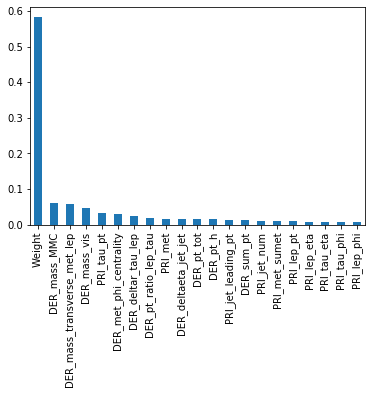

In [50]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(21).plot(kind='bar')
plt.show()

##  Dropped Features which are less important

In [51]:
X.drop(["PRI_met_phi","PRI_tau_phi","PRI_lep_phi","PRI_met","PRI_lep_eta","PRI_tau_eta"],axis=1,inplace=True)

In [52]:
X.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_lep_pt,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.787446,0.422594,0.316135,0.288569,0.289582,0.518647,0.295974,0.283684,0.346603,0.454254,0.277761,0.290275,0.328573,0.326392,0.553889,0.301645
std,0.335168,0.314557,0.262628,0.283975,0.452920,0.311195,0.300021,0.288382,0.281402,0.422814,0.283985,0.279954,0.283790,0.325809,0.452803,0.336694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.896980,0.126374,0.121576,0.065282,0.000000,0.258299,0.029171,0.050501,0.119755,0.013820,0.052870,0.067491,0.101811,0.000000,0.000000,0.003205
50%,0.919391,0.405464,0.261950,0.199892,0.000000,0.568213,0.199987,0.184522,0.293269,0.373494,0.181052,0.207371,0.257680,0.333333,0.888317,0.215969
75%,0.940705,0.682415,0.442822,0.424446,0.996226,0.781719,0.475389,0.432624,0.510490,0.933735,0.415886,0.428573,0.487521,0.666667,0.919459,0.449380
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [54]:
y_train.value_counts()

1.0    131268
0.0     68732
Name: Label, dtype: int64

In [55]:
y_test.value_counts()

1.0    33065
0.0    16935
Name: Label, dtype: int64

### Decision Tree Classifier ( After removing less important features) 

In [56]:
model_list = []

def models_dt(x,y,x_train,y_train,x_test,y_test):
    mod = {}
    model = DecisionTreeClassifier().fit(x_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'DecisionTreeClassifier'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['Cross-val Score'] = cross_val_score(model,X,y,cv=5).mean()
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
model_list.append(models_dt(X,y,X_train,y_train,X_test,y_test))



### Random Forest Classifier ( After removing less important features)

In [57]:
def models_rf(x,y,x_train,y_train,x_test,y_test):
    mod = {}
    model = RandomForestClassifier().fit(x_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'RandomForestClassifier'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['Cross-val Score'] = cross_val_score(model,X,y,cv=5).mean()
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
model_list.append(models_rf(X,y,X_train,y_train,X_test,y_test))


In [58]:
model_score = pd.DataFrame(model_list)
model_score

,Model,Train_Score,Test_accuracy,Cross-val Score,f1score,recall,precision,roc_auc
0,DecisionTreeClassifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,RandomForestClassifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [59]:
X.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'Weight'],
      dtype='object')

In [60]:
model = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
acc_score = accuracy_score(y_pred,y_test)
print(acc_score)

[[16935     0]
 [    0 33065]]
1.0


In [62]:
d = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

In [63]:
d

,predictions,actual
38683,1.0,1.0
64939,1.0,1.0
3954,1.0,1.0
120374,0.0,0.0
172861,1.0,1.0
...,...,...
179545,0.0,0.0
222647,0.0,0.0
171823,1.0,1.0
135782,1.0,1.0


In [64]:
import joblib
with open("perfect_model.joblib", 'wb') as x:
    joblib.dump(model, x, compress=3)

## Explainable AI

In [65]:
data = pd.read_csv('Training.csv',nrows=100,index_col=[0])
data["Label"] = data["Label"].map({"b":1.0,"s":0.0})
X = data.drop(['Label'],axis=1)
y = data['Label']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [67]:
dt = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
acc_score = accuracy_score(y_pred,y_test)
print(acc_score)

[[10  0]
 [ 0 15]]
1.0


In [69]:
d = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

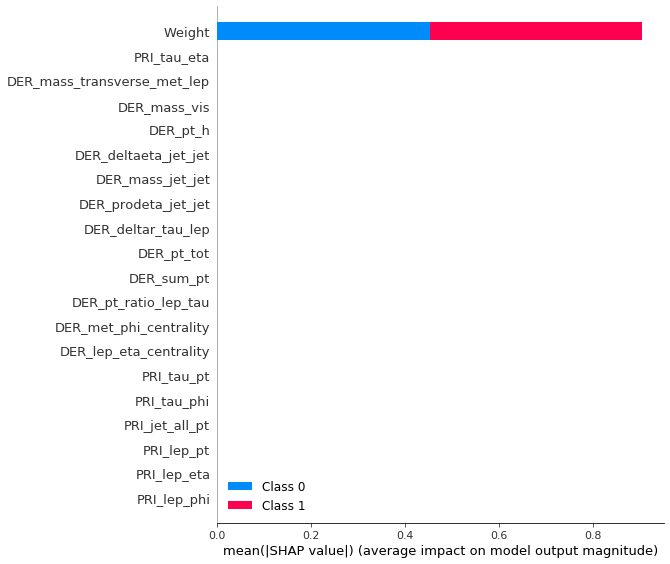

In [70]:
import shap
shap.values = shap.TreeExplainer(dt).shap_values(X_train)
shap.summary_plot(shap.values, X_train, plot_type='bar')

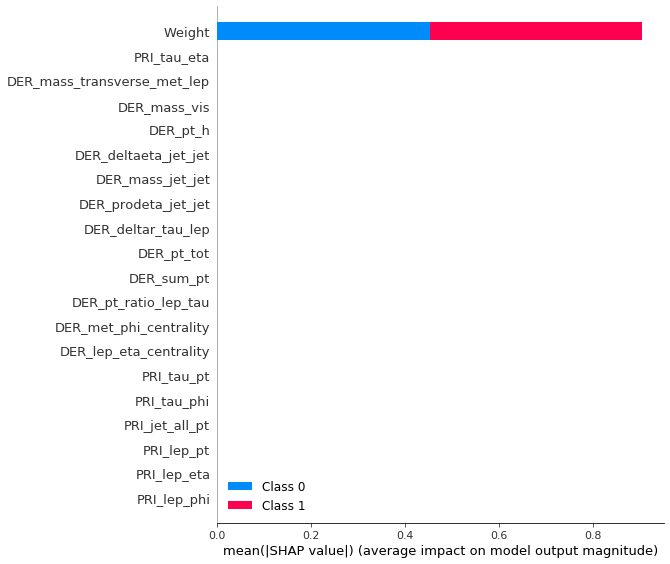

In [71]:
shap.summary_plot(shap.values, X_train)

In [72]:
# shap.initjs()

# def shap_plot(j):
    
#     explainerModel = shap.TreeExplainer(dt)
#     shap_values_Model = explainerModel.shape_values(S)
#     p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
#     return(p)
# X_output = X_test.copy()
# X_output.loc[:,'Label'] = np.round(dt.predict(X_output),2)

# random_picks = np.arange(1,50)
# S = X_output.iloc[random_picks]
# S

In [73]:
import streamlit as st
import matplotlib
import sklearn


In [74]:
print("streamlit==",st.__version__)
print("numpy==",np.__version__)
print("matplotlib==",matplotlib.__version__)
print("pandas==",pd.__version__)
print("scikit_learn==",sklearn.__version__)
print("joblib==",joblib.__version__)
print("shap==",shap.__version__)

streamlit== 0.89.0
numpy== 1.18.1
matplotlib== 3.1.3
pandas== 1.0.3
scikit_learn== 1.0
joblib== 1.0.1
shap== 0.36.0
